# Сборный проект

Интернет-магазине «Стримчик». Есть данные собранные из открытых источников. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Открываем файл с данными и изучаем информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
from google.colab import files

# Загружаем сразу несколько файлов (можно выделить их при выборе)
uploaded = files.upload()

Saving games.csv to games (1).csv


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('games.csv')

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете 16715 строк и 11 колонок, имеются пропуски, некоректное название столбцов и тип данных.

## Подготавливаем данные

Приводим все названия столбцов к нижнему регистру.

In [7]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обработаем пропуски.

Удаляем явные дубликаты.

In [8]:
data = data.drop_duplicates()

In [9]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Действительно, есть еще 1 неявный дубликат, удалим его.

In [10]:
data = data.drop(index=16230)

Смотрим все пропуски.

In [11]:
data.isna().sum()

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


In [12]:
print('Пропуски в столбце name составляют', data['name'].isna().sum()/len(data['name'])*100, '%')
print('Пропуски в столбце year_of_release составляют', data['year_of_release'].isna().sum()/len(data['name'])*100, '%')
print('Пропуски в столбце genre составляют', data['genre'].isna().sum()/len(data['name'])*100, '%')
print('Пропуски в столбце critic_score составляют', data['critic_score'].isna().sum()/len(data['name'])*100, '%')
print('Пропуски в столбце user_score составляют', data['user_score'].isna().sum()/len(data['name'])*100, '%')
print('Пропуски в столбце rating составляют', data['rating'].isna().sum()/len(data['name'])*100, '%')

Пропуски в столбце name составляют 0.011966016513102789 %
Пропуски в столбце year_of_release составляют 1.6094292210123249 %
Пропуски в столбце genre составляют 0.011966016513102789 %
Пропуски в столбце critic_score составляют 51.32224482469786 %
Пропуски в столбце user_score составляют 40.09213832715089 %
Пропуски в столбце rating составляют 40.48103386382673 %


Удаляем пропуски там, где они составляют меньше 1%. Это name, genre.

In [13]:
data = data.dropna(subset=['name', 'genre'])

In [14]:
#Заменим пропуски в столбце year_of_release, critic_score на индикатор (-1).
data['year_of_release'] = data['year_of_release'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)

<ipython-input-14-b22971410565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].fillna(-1)
<ipython-input-14-b22971410565>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['critic_score'] = data['critic_score'].fillna(-1)


In [15]:
print('user_score = tbd составляет от общего числа', data[data['user_score']=='tbd']['user_score'].count()/len(data['name'])*100, '%')
data['user_score'].unique()

user_score = tbd составляет от общего числа 14.504547630445188 %


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
# Заменим в столбце user_score пропуски на индикатор (-1), а значения tbd на индикатор (-2).
data.loc[data['user_score']=='tbd', 'user_score'] = -2
data['user_score'] = data['user_score'].fillna(-1)

<ipython-input-16-d26951ff0ad9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = data['user_score'].fillna(-1)


tbd это данные которые возможно в будущем будут дополнены.

Пропуски в столбце rating заменим на 'unknown'.

In [17]:
data['rating'] = data['rating'].fillna('unknown')

<ipython-input-17-d18d66675055>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].fillna('unknown')


In [18]:
data.isna().sum()

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,0
user_score,0


In [19]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  object 
 10  rating           16712 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,unknown


In [20]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = data['user_score'].astype('float')

Подсчитаем сумаррные продажи во всех регионах и запишем их в новый стобец total_sales.

In [21]:
data['total_sales'] = data.loc[:,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


Удалены строки с пропусками в столбцах name, genre. year_of_release пропуски заменили на -1. critic_score пропуски заменили на -1. user_score пропуски заменили на -1, а tbd заменены на -2. rating пропуски заменили на unknown. Пропуски появились скорее всего из-за технического сбоя, либо система сбора данных плохо настроена. Сделали столбец total_sales с суммарными продажами по всем регионам.

##  Проводим исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы.

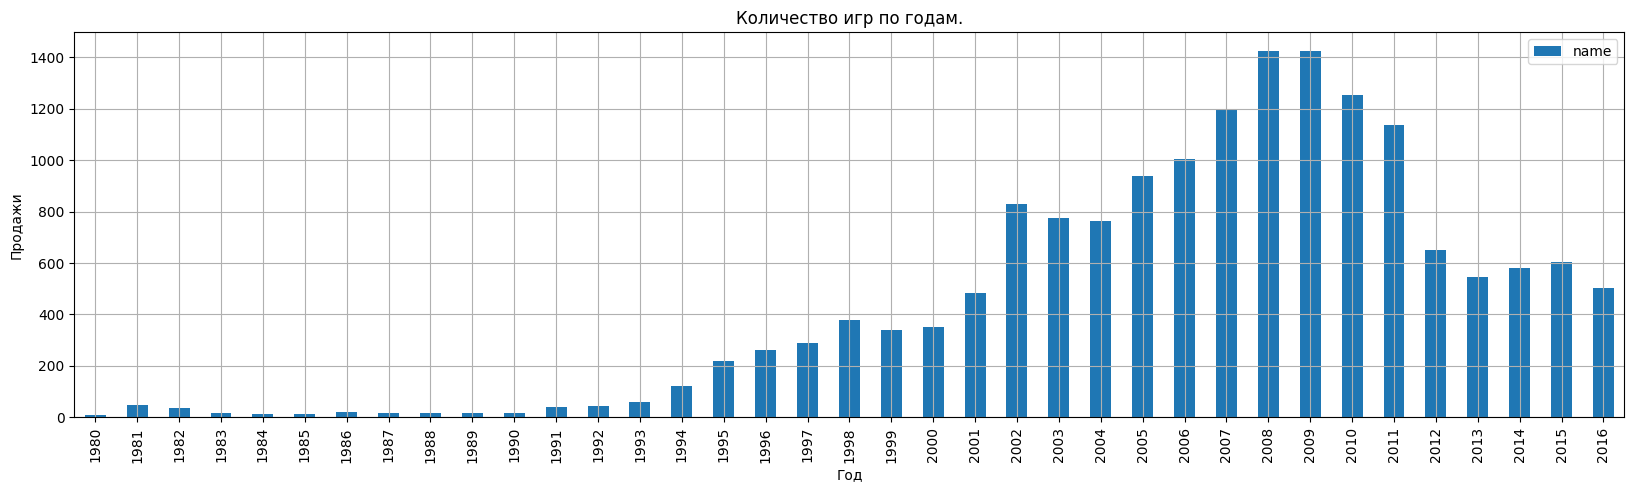

Описание


,year_of_release
count,16443.000000
mean,2006.485921
std,5.875546
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2016.000000


In [22]:
(
    data
    .query('year_of_release != -1')
    .pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', grid=True, figsize=(20,5))
)
plt.title('Количество игр по годам.')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()
print('Описание')
data[data['year_of_release']>0]['year_of_release'].describe()

В таблице приведены все игры с 1980 по 2016 год, и игры, в которых не указан год, они обозначены -1. Рост числа игр начинается с 1994 года, максимальное кол-во игр выпускалось с 2008-2009 год.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы.

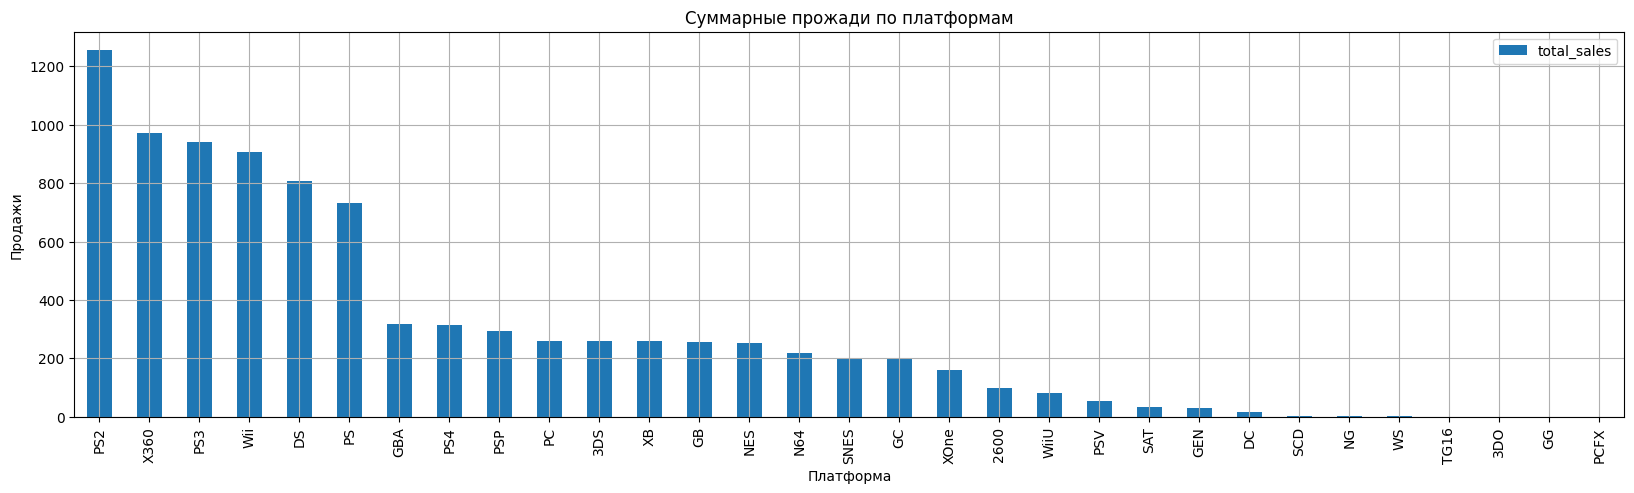

In [23]:
(
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(20, 5))
)

plt.title('Суммарные прожади по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

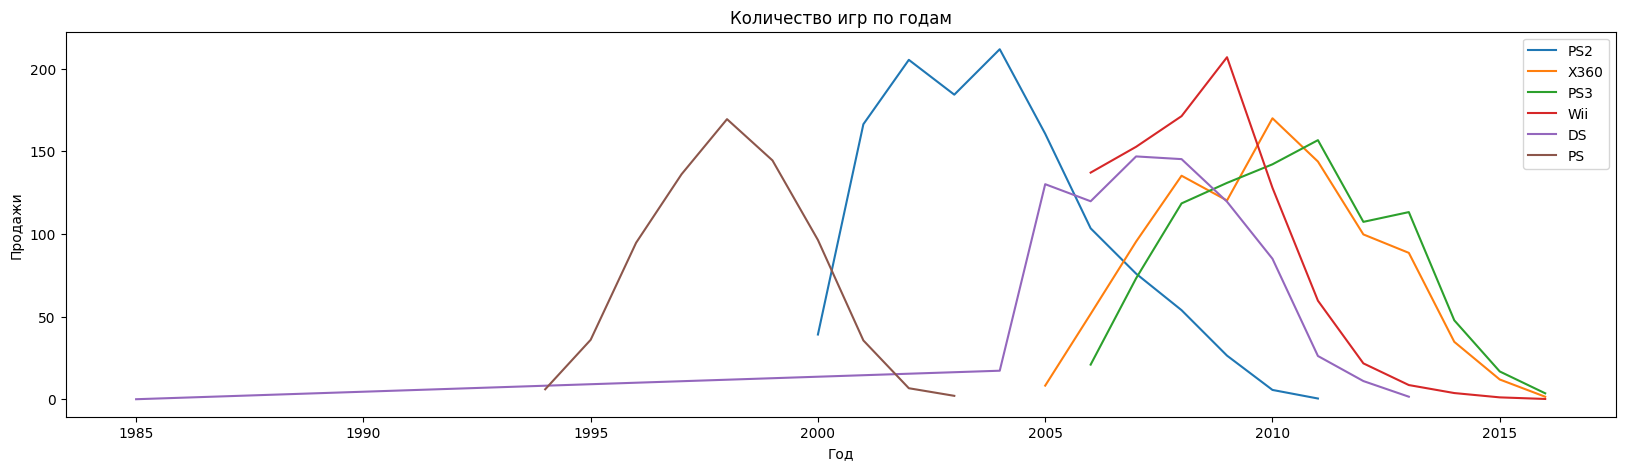

In [24]:
# Возмем первые 6 платформ.
top_six=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for name in top_six:
    (
    data
    .query('platform == @name and year_of_release > 0')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values('year_of_release', ascending=False)['total_sales']
    .plot(figsize=(20,5), label=name)
    )
    plt.legend()
    plt.title('Количество игр по годам')
    plt.xlabel('Год')
    plt.ylabel('Продажи')

In [25]:
data.query('platform=="DS" and year_of_release < 2003')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3081,LEGO Harry Potter: Years 5-7,DS,-1,Action,0.34,0.25,0.00,0.07,69,-2.0,E10+,0.66
3289,Advance Wars: Days of Ruin,DS,-1,Strategy,0.43,0.12,0.00,0.05,86,8.7,E10+,0.60
5443,Bejeweled 3,DS,-1,Puzzle,0.29,0.02,0.00,0.02,75,-2.0,E,0.33
5932,Shrek the Third,DS,-1,Action,0.26,0.01,0.00,0.02,70,6.5,E,0.29
9664,Charm Girls Club: My Fashion Mall,DS,-1,Simulation,0.12,0.00,0.00,0.01,-1,-2.0,E,0.13
9855,The Daring Game for Girls,DS,-1,Adventure,0.11,0.00,0.00,0.01,-1,-2.0,E,0.12
10486,Atsumare! Power Pro Kun no DS Koushien,DS,-1,Sports,0.00,0.00,0.10,0.00,-1,-1.0,unknown,0.10
10612,My Healthy Cooking Coach,DS,-1,Simulation,0.09,0.00,0.00,0.01,-1,-2.0,E,0.10
10686,Happy Feet Two,DS,-1,Action,0.08,0.01,0.00,0.01,-1,-2.0,E,0.10
10764,Luminous Arc 2 (JP sales),DS,-1,Role-Playing,0.00,0.00,0.10,0.00,-1,-1.0,unknown,0.10


In [26]:
data.loc[15957, 'year_of_release']=-1

In [27]:
time_platform = data.query('year_of_release > 0').pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
time_platform['time_total'] = time_platform['max'] - time_platform['min']
print('Медианное значение существования платформы', int(time_platform['time_total'].median()), 'лет')
time_platform

Медианное значение существования платформы 6 лет


,min,max,time_total
,year_of_release,year_of_release,
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,2004,2013,9
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6


Больше всего игр вышло на 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. В среднем срок жизни платформы составляет 6 лет.

Возмем данные за актуальный период (предположим он начинается с 2013 года) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

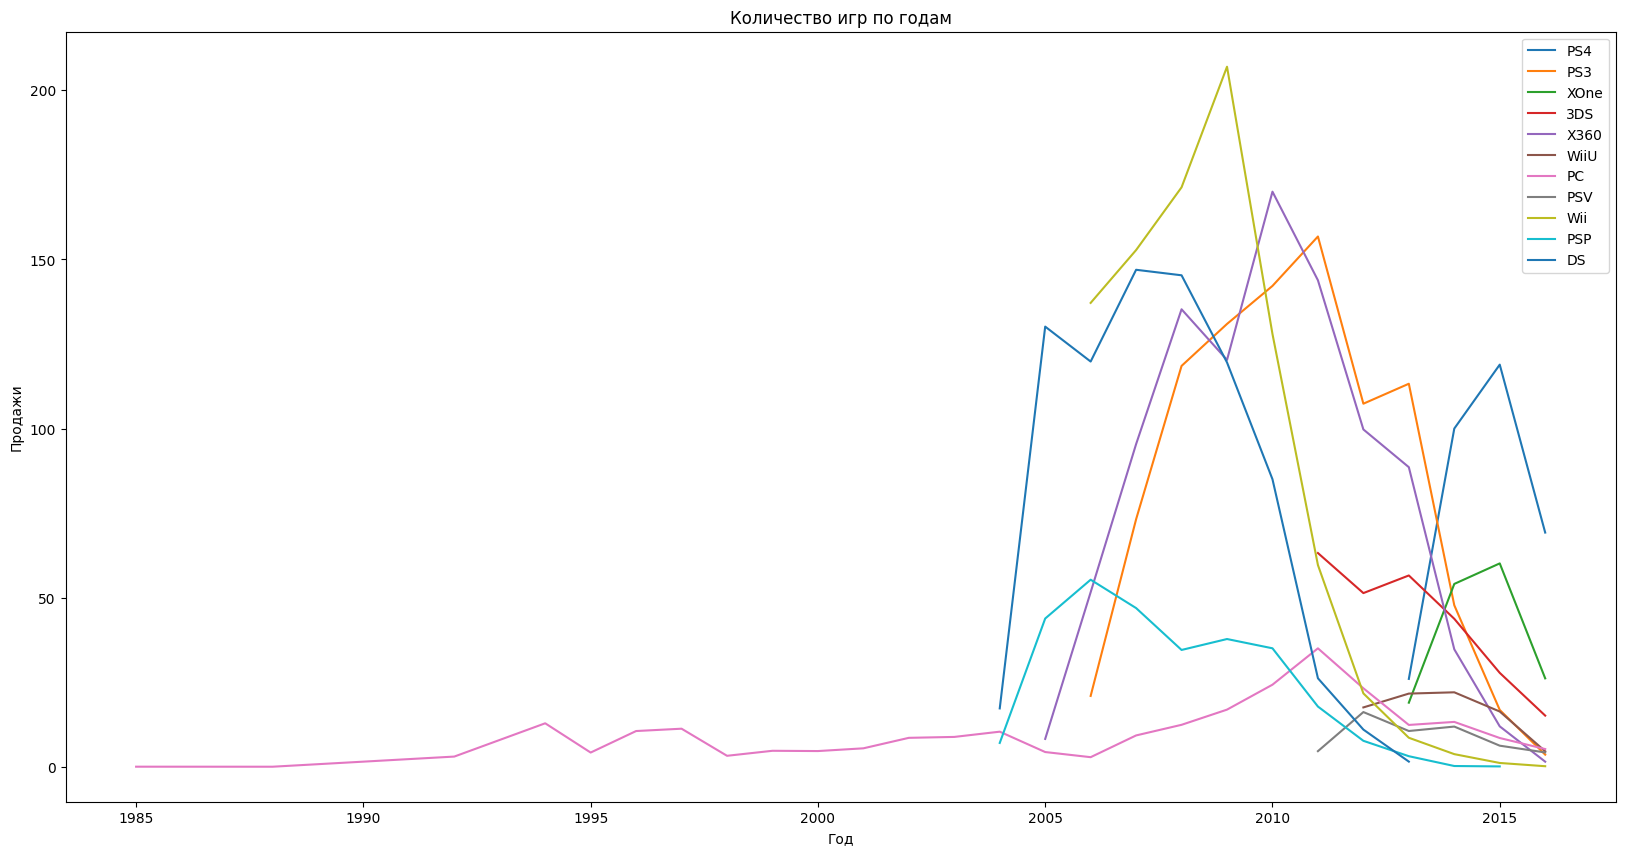

In [28]:
actual_platform_2013 = (
    data.query('year_of_release >= 2013')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()['platform'].tolist()
)
actual_platform_2013

for name in actual_platform_2013:
    (
    data.query('platform == @name and year_of_release > 0')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values('year_of_release', ascending=False)['total_sales']
    .plot(figsize=(20,10), label=name)
    )
    plt.legend()
    plt.title('Количество игр по годам')
    plt.xlabel('Год')
    plt.ylabel('Продажи')

Актуальные платформы в 2017 году: PS4 и XOne, но они идут на спад, скорее всего их заменят более совершенные платформы. Также можно выделить PC, который актуален уже больше 31 года, у DS скорее всего имеется какой то выброс.

In [29]:
(
    data
    .query('year_of_release >= 2016')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


Если смотреть по выпускам игр за последний 2016год, то ТОП 3 это PS4, XOne, 3DS

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

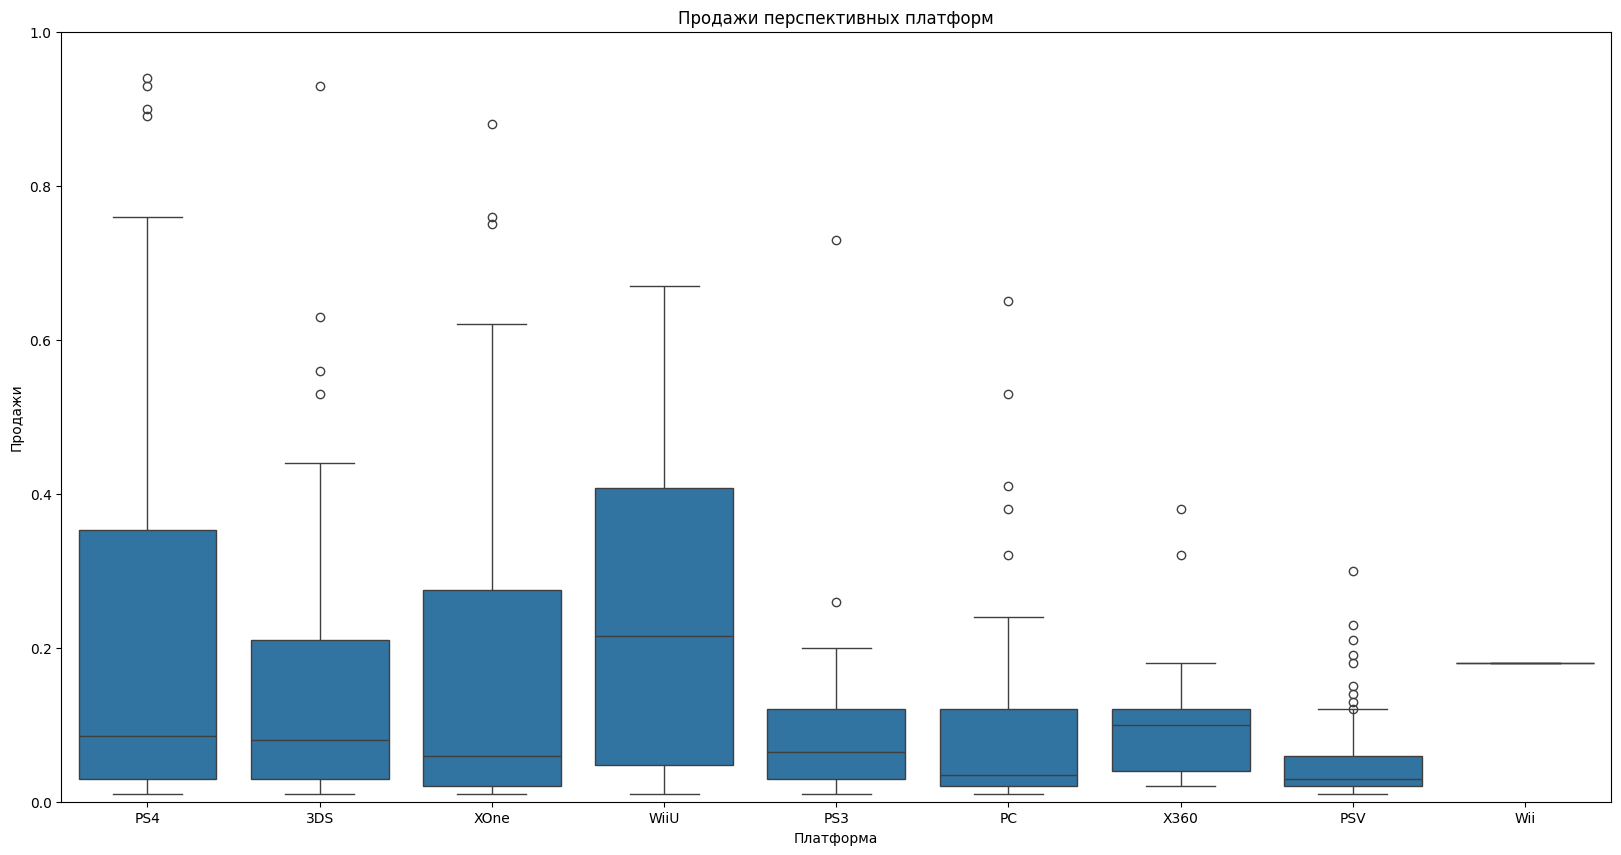

In [30]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='platform', y='total_sales', data=data.query('year_of_release >= 2016'))
ax.set(ylim=(0,1))
ax.set_title('Продажи перспективных платформ')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи')
plt.show()

In [31]:
(
    data
    .query('year_of_release >= 2016')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .describe()
)

,total_sales
count,9.000000
mean,14.437778
std,22.120826
min,0.180000
25%,3.600000
50%,4.600000
75%,15.140000
max,69.250000


Медианное значение проданых игр по всем платформам за 2016 год 14.4 млн. Также видим, что почти на каждой платформе есть выбросы, скорее всего это очень популярные игры.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Посмотрим на корреляцию между оценками пользователя, критиков и продажами топ 6 платформ за все время.

Корреляция между отзывами пользователей и продажами на платформе PS4 = -0.031957110204556424
Корреляция между отзывами критиков и продажами на платформе PS4 = 0.40656790206178095


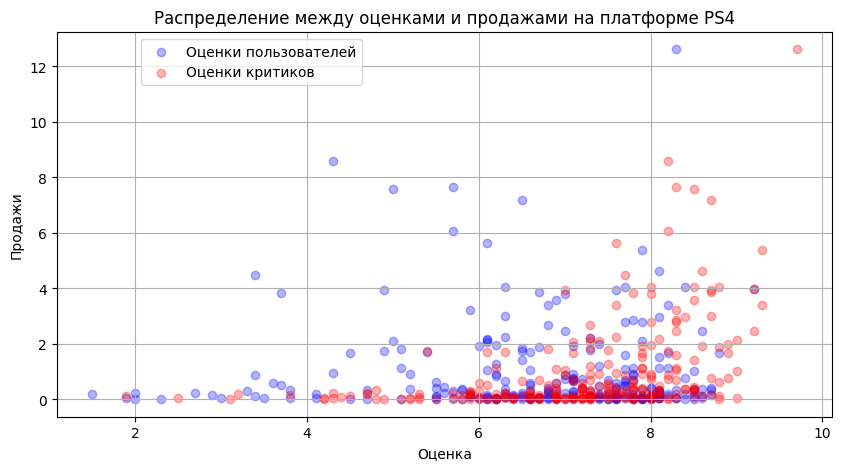

Корреляция между отзывами пользователей и продажами на платформе PS3 = 0.12620720462052884
Корреляция между отзывами критиков и продажами на платформе PS3 = 0.43337268693947584


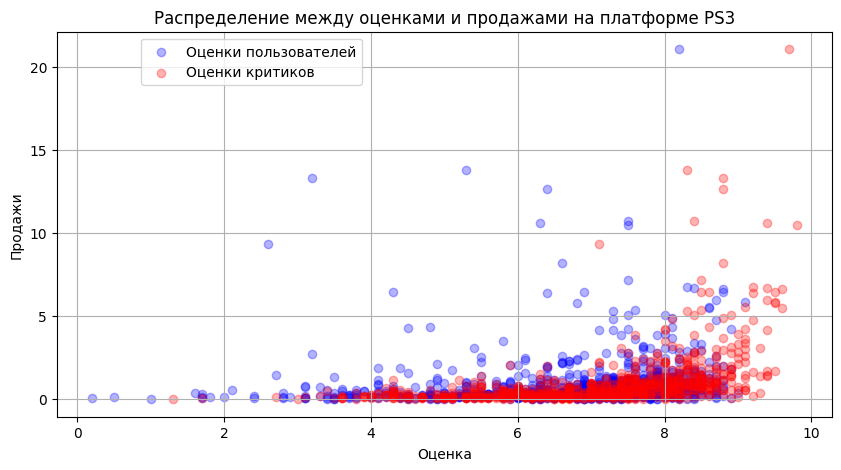

Корреляция между отзывами пользователей и продажами на платформе XOne = -0.06892505328279414
Корреляция между отзывами критиков и продажами на платформе XOne = 0.4169983280084017


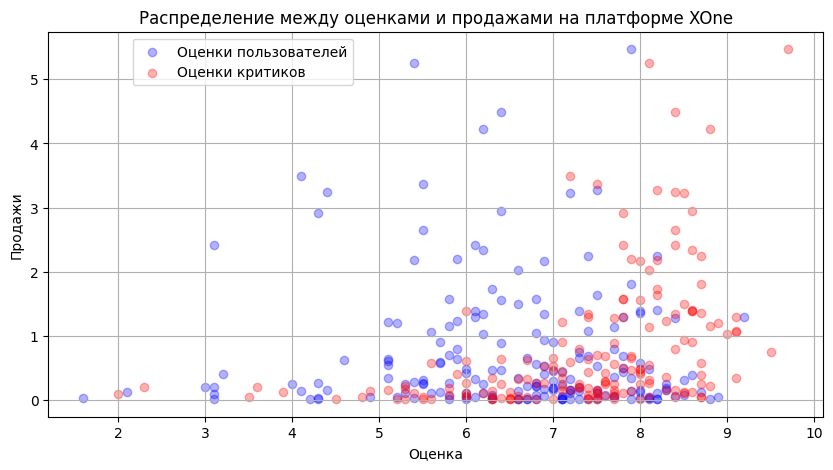

Корреляция между отзывами пользователей и продажами на платформе 3DS = 0.22480798039571082
Корреляция между отзывами критиков и продажами на платформе 3DS = 0.3494009303924131


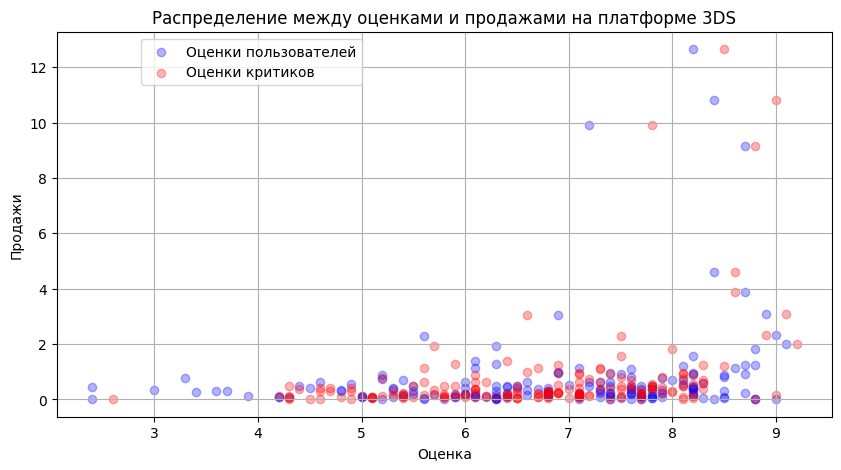

Корреляция между отзывами пользователей и продажами на платформе X360 = 0.11445882978454185
Корреляция между отзывами критиков и продажами на платформе X360 = 0.3937358653072588


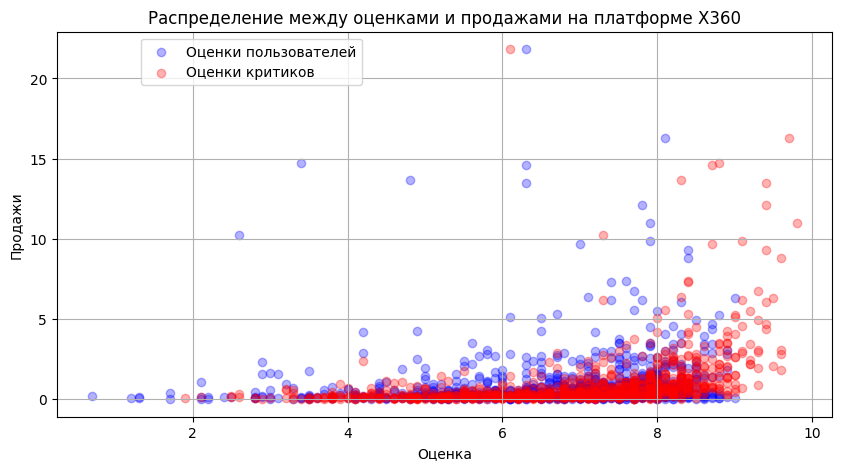

In [32]:
top_five = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
for name in top_five:
    user_data = data.query('platform == @name and user_score >= 0')
    critic_data = data.query('platform == @name and critic_score >= 0')
    plt.figure(figsize=(10, 5))
    plt.scatter(user_data['user_score'], user_data['total_sales'], label='Оценки пользователей', color='blue', alpha=0.3)
    plt.scatter(critic_data['critic_score']/10, critic_data['total_sales'], label='Оценки критиков', color='red', alpha=0.3)
    plt.title(f'Распределение между оценками и продажами на платформе {name}')
    plt.xlabel('Оценка')
    plt.ylabel('Продажи')
    plt.legend(loc='upper left', bbox_to_anchor=(0.1, 1))
    user_corr = user_data['user_score'].corr(user_data['total_sales'])
    critic_corr = critic_data['critic_score'].corr(critic_data['total_sales'])
    print(f'Корреляция между отзывами пользователей и продажами на платформе {name} = {user_corr}')
    print(f'Корреляция между отзывами критиков и продажами на платформе {name} = {critic_corr}')
    plt.grid()
    plt.show()

Корреляция слабо выражена = 0.1-0.3. Но корреляция от критиков выше.

Посмотрим на общее распределение игр по жанрам.

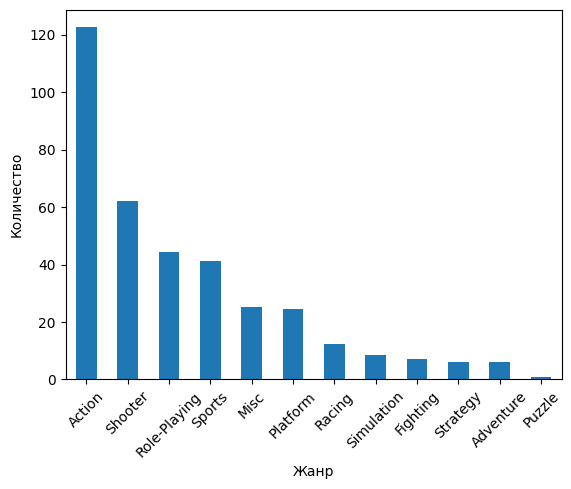

In [33]:
(
    data
    .query('year_of_release == 2013')
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', legend=False)
)
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Самые популярные жанры за все время : Action, Shooter, Role-Playing.

Теперь возмем 2015 и 2016 год и сравним, как там обстоят дела.

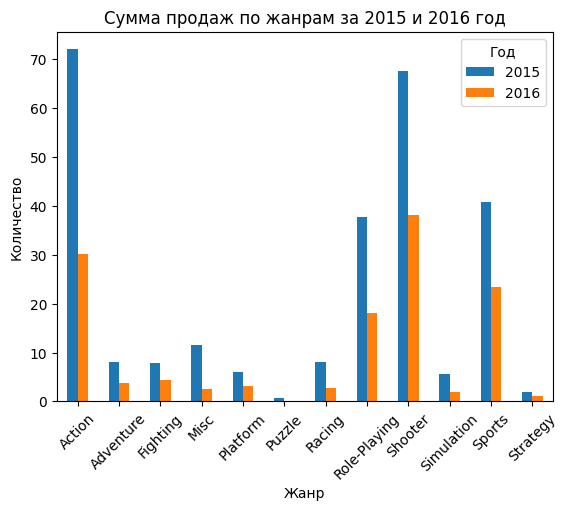

In [34]:
top_genre_2015 = data.query('year_of_release == 2015').pivot_table(index='genre', values='total_sales', aggfunc='sum')
top_genre_2016 = data.query('year_of_release == 2016').pivot_table(index='genre', values='total_sales', aggfunc='sum')
comb_genre = pd.concat([top_genre_2015, top_genre_2016], axis=1)
comb_genre.columns = ['2015', '2016']
comb_genre.plot(kind='bar', legend=True)
plt.title('Сумма продаж по жанрам за 2015 и 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='Год')
plt.show()

Продажи в 2016 году ниже, чем за прошлый год, но самые популярные жанры остались теми же.

Text(0, 0.5, 'Количество')

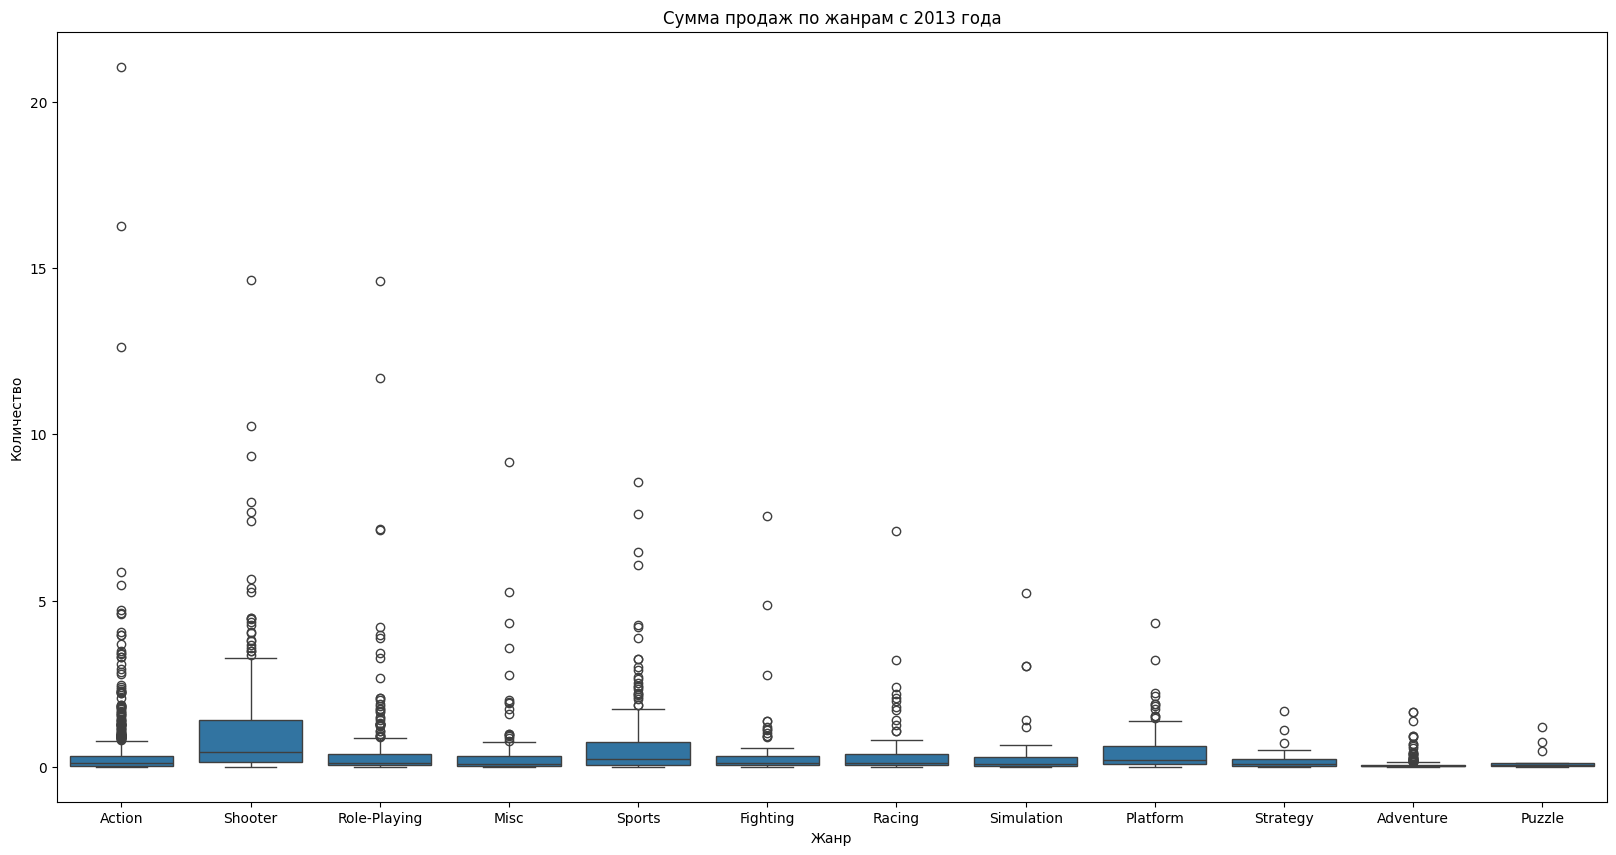

In [35]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=data.query('year_of_release >= 2013').reset_index(drop= True), x='genre', y='total_sales')
plt.title('Сумма продаж по жанрам c 2013 года')
plt.xlabel('Жанр')
plt.ylabel('Количество')

Из графика видим, что в каждом жанре присутствую выбросы, скорее всего это какие то отдельно сильно популярные игры в жанре, также стоит выделить ШУТЕРЫ, т.к. у них диапазом между нижним и верхним квартилем гораздо больше.

Рост числа продаж игр приходится на 2008-2009 год, дальше идет спад. За весь период самые популярные платформы PS2, X360, PS3, Wii, DS, PS. В среднем платформа актуально 6 лет. Топ 3платформ с 2013 года : PS4, PS3, XOne. Также PC уже актуален больше 31 года. Медианное значение проданных игр за 2016 год составляет 14.4 млн. Корреляция между оценками пользователя, критиков и продажами на разных платформах слабая, но у критиков она немного выше. Актуальные жанры (с 2013 года) Action, Shooter, Role-Playing, Sports. Продажи в 2016 году ниже, чем за прошлый год, но самые популярные жанры остались теми же.

##  Составляем портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

Возмем платформы начиная с 2013 года и по 2016.

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [36]:
data_actual = data.query('year_of_release >= 2013').reset_index(drop= True)
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [37]:
na_reg_pl = (
    data_actual
    .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False).reset_index()
    .head(5)
)
eu_reg_pl = (
    data_actual
    .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
    .sort_values('eu_sales', ascending=False).reset_index()
    .head(5)
)
jp_reg_pl = (
    data_actual
    .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
    .sort_values('jp_sales', ascending=False).reset_index()
    .head(5)
)
top_pl = pd.merge(na_reg_pl, eu_reg_pl, left_index=True, right_index=True)
top_pl = pd.merge(top_pl, jp_reg_pl, left_index=True, right_index=True)
top_pl.rename(columns = {'platform_x':'na_platform', 'platform_y':'eu_platform', 'platform':'jp_platform'}, inplace = True )
top_pl

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,PS4,108.74,PS4,141.09,3DS,67.81
1,XOne,93.12,PS3,67.81,PS3,23.35
2,X360,81.66,XOne,51.59,PSV,18.59
3,PS3,63.50,X360,42.52,PS4,15.96
4,3DS,38.20,3DS,30.96,WiiU,10.88


Самые популярные платформы по регионам в таблице.

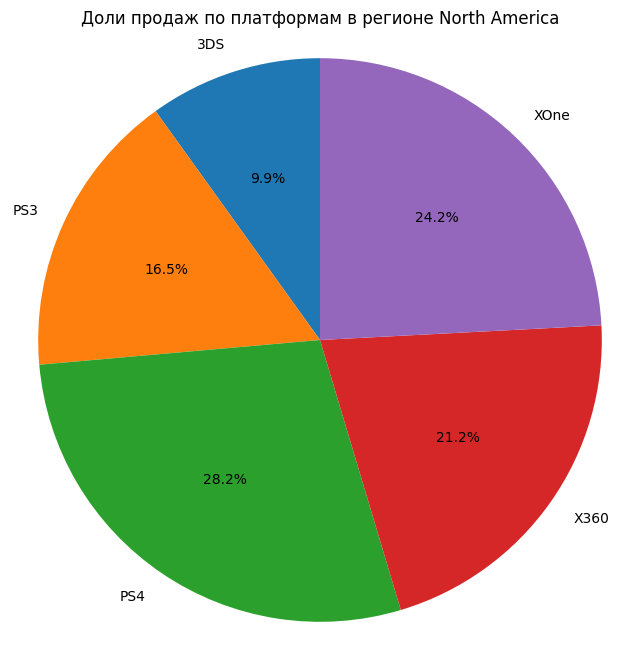

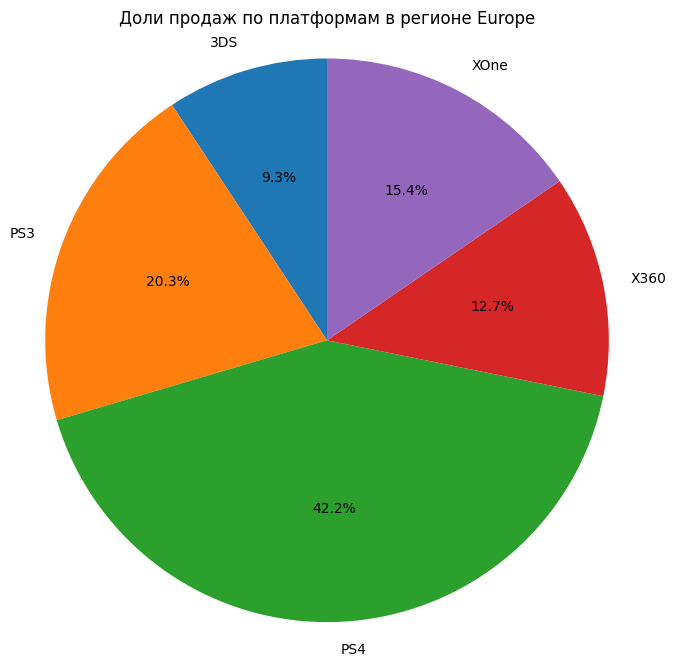

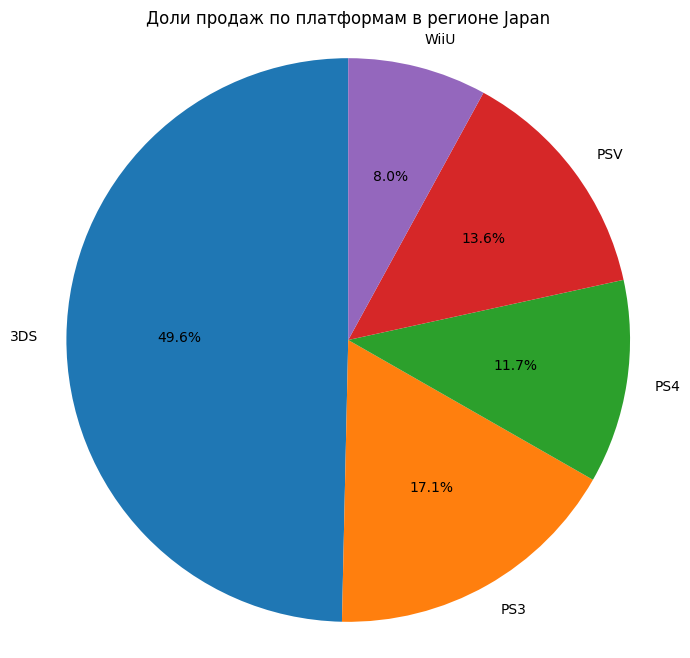

In [38]:
na_sales_summary = top_pl.groupby('na_platform')['na_sales'].sum()
eu_sales_summary = top_pl.groupby('eu_platform')['eu_sales'].sum()
jp_sales_summary = top_pl.groupby('jp_platform')['jp_sales'].sum()

regions = [('North America', na_sales_summary),
           ('Europe', eu_sales_summary),
           ('Japan', jp_sales_summary)]

for region_name, sales_summary in regions:
    plt.figure(figsize=(8, 8))
    plt.pie(sales_summary, labels=sales_summary.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Доли продаж по платформам в регионе {region_name}')
    plt.axis('equal')
    plt.show()

В Америке и Европе лидирует PS4, а в Японии 3DS.

### Самые популярные жанры (топ-5). Поясните разницу.

In [39]:
na_reg_gr = (
    data_actual
    .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False).reset_index()
    .head(5)
)
eu_reg_gr = (
    data_actual
    .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')
    .sort_values('eu_sales', ascending=False).reset_index()
    .head(5)
)
jp_reg_gr = (
    data_actual
    .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')
    .sort_values('jp_sales', ascending=False).reset_index()
    .head(5)
)
top_genre = pd.merge(na_reg_gr, eu_reg_gr, left_index=True, right_index=True)
top_genre = pd.merge(top_genre, jp_reg_gr, left_index=True, right_index=True)
top_genre.rename(columns = {'genre_x':'na_genre', 'genre_y':'eu_genre', 'genre':'jp_genre'}, inplace = True )
top_genre

,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,Action,126.05,Action,118.13,Role-Playing,51.04
1,Shooter,109.74,Shooter,87.86,Action,40.49
2,Sports,65.27,Sports,60.52,Misc,9.20
3,Role-Playing,46.40,Role-Playing,36.97,Fighting,7.65
4,Misc,27.49,Racing,20.19,Shooter,6.61


Опять видим, что в Америке и Европе жанры совпадают Action, а в Японии Role-Playing.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [40]:
data_actual['rating'].unique()

array(['M', 'unknown', 'E', 'T', 'E10+'], dtype=object)

In [41]:
na_reg_rt = (
    data_actual
    .pivot_table(index=['rating'], values=['na_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False).reset_index()
    .head(5)
)
eu_reg_rt = (
    data_actual
    .pivot_table(index=['rating'], values=['eu_sales'], aggfunc='sum')
    .sort_values('eu_sales', ascending=False).reset_index()
    .head(5)
)
jp_reg_rt = (
    data_actual
    .pivot_table(index=['rating'], values=['jp_sales'], aggfunc='sum')
    .sort_values('jp_sales', ascending=False).reset_index()
    .head(5)
)
top_rating = pd.merge(na_reg_rt, eu_reg_rt, left_index=True, right_index=True)
top_rating = pd.merge(top_rating, jp_reg_rt, left_index=True, right_index=True)
top_rating.rename(columns = {'rating_x':'na_rating', 'rating_y':'eu_rating', 'rating':'jp_rating'}, inplace = True )
top_rating

,na_rating,na_sales,eu_rating,eu_sales,jp_rating,jp_sales
0,M,165.21,M,145.32,unknown,85.05
1,unknown,89.42,E,83.36,T,20.59
2,E,79.05,unknown,78.91,E,15.14
3,E10+,54.24,E10+,42.69,M,14.11
4,T,49.79,T,41.95,E10+,5.89


Видим, что в Америке и Европе схожий рейтинг M, а в Японии unknown.

Самые популярные платформы по регионам. В Америке и Европе лидирует PS4, в Японии 3DS. С жанрами схожая ситуация, в Америке и Европе они опять совпадают, это Action, а в Японии Role-Playing. Смотря на ESRB видим, что в Америке и Европе схожий рейтинг M, а в Японии T.

##  Проверяем гипотезы

In [42]:
# Зададим значение alpha.
alpha = 0.05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформируем 2 гипотезы.

Н0. Средние пользовательские рейтинги платформ XOne равны PC.
Н1. Средние пользовательские рейтинги платформ XOne не равны PC.

In [43]:
xbox = data_actual.query('platform == "XOne" and user_score >= 0')
pc = data_actual.query('platform == "PC" and user_score >= 0')
results = st.ttest_ind(
    xbox['user_score'],
    pc['user_score'],
    alternative='two-sided'
)

print('p-значение ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, предполагаем что рейтинги равны при alpha 0.05.

In [44]:
display(xbox['user_score'].describe())
pc['user_score'].describe()

,user_score
count,182.000000
mean,6.521429
std,1.380941
min,1.600000
25%,5.800000
50%,6.800000
75%,7.500000
max,9.200000


,user_score
count,155.000000
mean,6.269677
std,1.742381
min,1.400000
25%,5.300000
50%,6.800000
75%,7.600000
max,9.300000


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформируем 2 гипотезы.

Н0. Средние пользовательские рейтинги жанров Action равны Sports.
Н1. Средние пользовательские рейтинги жанров Action не равны Sports.

In [45]:
action = data_actual.query('genre == "Action" and user_score >= 0')
sports = data_actual.query('genre == "Sports" and user_score >= 0')
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    alternative='two-sided'
)

print('p-значение ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение  1.0517832389140023e-27
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу и исходя из этого предполагаем, что рейтинги разные у жанров Action и Sports.

In [46]:
display(action['user_score'].describe())
sports['user_score'].describe()

,user_score
count,389.000000
mean,6.837532
std,1.330173
min,2.000000
25%,6.300000
50%,7.100000
75%,7.800000
max,9.100000


,user_score
count,160.000000
mean,5.238125
std,1.783427
min,0.200000
25%,4.100000
50%,5.500000
75%,6.500000
max,8.800000


 Есть основания полагать, что рейтинги XOne и PC равны при alpha 0.05. Также, предполагаем, что рейтинги разные у жанров Action и Sports.

## Общий вывод

Были исследованы данные из открытых источников по различным платформам. Общая информация:16715 rows × 11 columns. Имеются пропуски и некорректные типы данных. Удалены строки с пропусками в столбцах name, genre. Удален неявный дубликат. year_of_release пропуски заменили на -1. critic_score пропуски заменили на -1. user_score пропуски заменили на -1, а tbd заменены на -2 (т.к. в будущем возможно появится информация). rating пропуски заменили на unknown. Пропуски появились скорее всего из-за технического сбоя, либо система сбора данных плохо настроена. Сделали столбец total_sales с суммарными продажами по всем регионам.

Рост числа продаж игр приходится на 2008-2009 год, дальше идет спад. За весь период самые популярные платформы PS2, X360, PS3, Wii, DS, PS. В среднем платформа актуально 6 лет. Топ 3платформ с 2013 года : PS4, PS3, XOne. Также PC уже актуален больше 31 года. Медианное значение проданных игр за 2016 год составляет 14.4 млн. Корреляция между оценками пользователя, критиков и продажами на разных платформах слабая, но у критиков она немного выше. Актуальные жанры (с 2013 года) Action, Shooter, Role-Playing, Sports. Продажи в 2016 году ниже, чем за прошлый год, но самые популярные жанры остались теми же. На графике boxplot стоит выделить шутер, как самый стабильный жанр.

Самые популярные платформы по регионам. В Америке и Европе лидирует PS4, в Японии 3DS. С жанрами схожая ситуация, в Америке и Европе они опять совпадают, это Action, а в Японии Role-Playing. Смотря на ESRB видим, что в Америке и Европе схожий рейтинг M, а в Японии T.

Есть основания полагать, что рейтинги XOne и PC равны при alpha 0.05. Также, предполагаем, что рейтинги разные у жанров Action и Sports.